In [1]:
import numpy as np
import pandas as pd
import LatentFactor
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import joblib
from sklearn.metrics import confusion_matrix,recall_score,roc_curve,precision_score,roc_auc_score
%matplotlib inline

In [2]:
train=pd.read_csv('d:\\Github\\projects-1\\Dataset\\train.csv')
test=pd.read_csv('d:\\Github\\projects-1\\Dataset\\test.csv')
item_pool=pd.read_csv('d:\\Github\\projects-1\\Dataset\\item_pool.csv')
item_pool=list(item_pool['oper_obj'])

In [3]:
#lf=LatentFactor.LatentFactor(F=32,N=45)
#初始训练
#lf.fit(train,item_pool,neg_ratio=10,iters=3,eta=0.1)
#lgb_clf=lf.train_prediction_model(train)
#joblib.dump(lf,'LatentFactor.model')
#joblib.dump(lgb_clf,'lgb_model.model')
#测试集冷启动
lf=joblib.load('LatentFactor.model')
lgb_clf=joblib.load('lgb_model.model')
lf.fit(test,item_pool,neg_ratio=10,iters=3,eta=0.1,init_model=lf)
lf.train_prediction_model(test)
joblib.dump(lf,'LatentFactor.model')
joblib.dump(lgb_clf,'lgb_model.model')

  0%|          | 0/3 [00:00<?, ?it/s]
===============Iteration 0===============

 33%|███▎      | 1/3 [00:04<00:09,  4.92s/it]cross entropy loss: 0.19592015769223775

===============Iteration 1===============

 67%|██████▋   | 2/3 [00:09<00:05,  5.00s/it]cross entropy loss: 0.17012678176969565

===============Iteration 2===============

100%|██████████| 3/3 [00:15<00:00,  5.02s/it]cross entropy loss: 0.14542281664833076
New user entries: 0

New item entries: 0


[LightGBM] [Info] Number of positive: 8223, number of negative: 60885
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10987
[LightGBM] [Info] Number of data points in the train set: 69108, number of used features: 64
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.118988 -> initscore=-2.002052
[LightGBM] [Info] Start training from score -2.002052
Trainin

['lgb_model.model']

In [4]:
#recommendation for test set
recmd_df=lf.feeling_lucky('fff5a4a7199141fa9f44bdbfa8bd53fa',topK=7)
recmd_df

,user_id,item_id,rank
0,0005548cd3b347cd9b35b4714d0716a1,2f47c73271d6469f9b6ded2a1eb3e5e2,1.0
1,0005548cd3b347cd9b35b4714d0716a1,13374180138745b6bc253bcdfa327de7,2.0
2,0005548cd3b347cd9b35b4714d0716a1,81dd32ea7d7944729088ae1245ea9772,3.0
3,0005548cd3b347cd9b35b4714d0716a1,7f9ef001f07349488dfbb64cd2fa1396,4.0
4,0005548cd3b347cd9b35b4714d0716a1,c82d878e889e44079f94a69a9b7d75a8,5.0
...,...,...,...
10376,fff5a4a7199141fa9f44bdbfa8bd53fa,36652ae046d147618f4212fab24e7b13,3.0
10377,fff5a4a7199141fa9f44bdbfa8bd53fa,07af3a32d00b4cb89d30ca55cb42e506,4.0
10378,fff5a4a7199141fa9f44bdbfa8bd53fa,77fde0f05c904fbcb9f219bbeee1b39b,5.0
10379,fff5a4a7199141fa9f44bdbfa8bd53fa,95d7b64191e9496e8bd3bae629d8bcc9,6.0


In [5]:
test_recall=lf.recall_dataset(test)
y_score=lgb_clf.predict(test_recall.drop(columns=['user_id','item_id','label']))
y_true=test_recall['label'].values

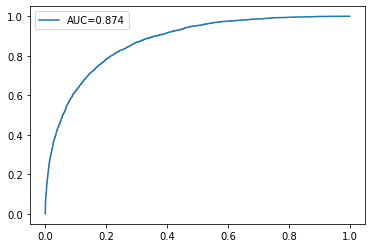

In [6]:
fpr,tpr,_=roc_curve(y_true,y_score,drop_intermediate=False)
auc=roc_auc_score(y_true,y_score)
plt.plot(fpr,tpr)
plt.legend(['AUC='+str(np.round(auc,3))])
plt.show()

In [7]:
threshold=0.5
y_pred=np.zeros(len(y_true))
y_pred[y_score>threshold]=1

In [8]:
print(confusion_matrix(y_true,y_pred))

[[50993  9983]
 [ 2158  5953]]


In [9]:
print(recall_score(y_true,y_pred))

0.7339415608432992
